# Cho tập dữ liệu Wine Quality #

In [ ]:
1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả

2. Phân tích khám phá dữ liệu
2.1 Kiểm tra giá trị thiếu
2.2 Vẽ histogram cho tất cả các biến và nhận xét
2.3 Vẽ boxplot cho tất cả các biến và nhận xét
2.4 Vẽ Scatterplot cho "alcohol" và "quality"

3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó

4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
4.1 Xáo trộn dữ liệu
4.2 Chia dữ liệu với 80% huấn luyện
4.3 Tách dữ liệu
4.4 Tách đặc trưng và nhãn

5. Chuẩn bị dữ liệu
5.1 Khởi tạo bộ dữ liệu chuẩn hóa
5.2 Chuẩn hóa huấn luyện
5.3 Chuẩn hóa kiểm tra

6. Ứng dụng mô hình hồi quy tuyến tính
6.1 Khởi tạo
6.2 Huấn luyện
6.3 Dự đoán trên tập kiểm tra

7. Đánh giá mô hình
Tính MSE và R^2

In [2]:
# 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("winequality-red.csv",sep=";")

In [3]:
# Hiển thị 5 dòng đầu tiên
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Thông tin về dữ liệu
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Thống kê mô tả
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#2. Phân tích khám phá dữ liệu
# 2.1 Kiểm tra giá trị thiếu
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

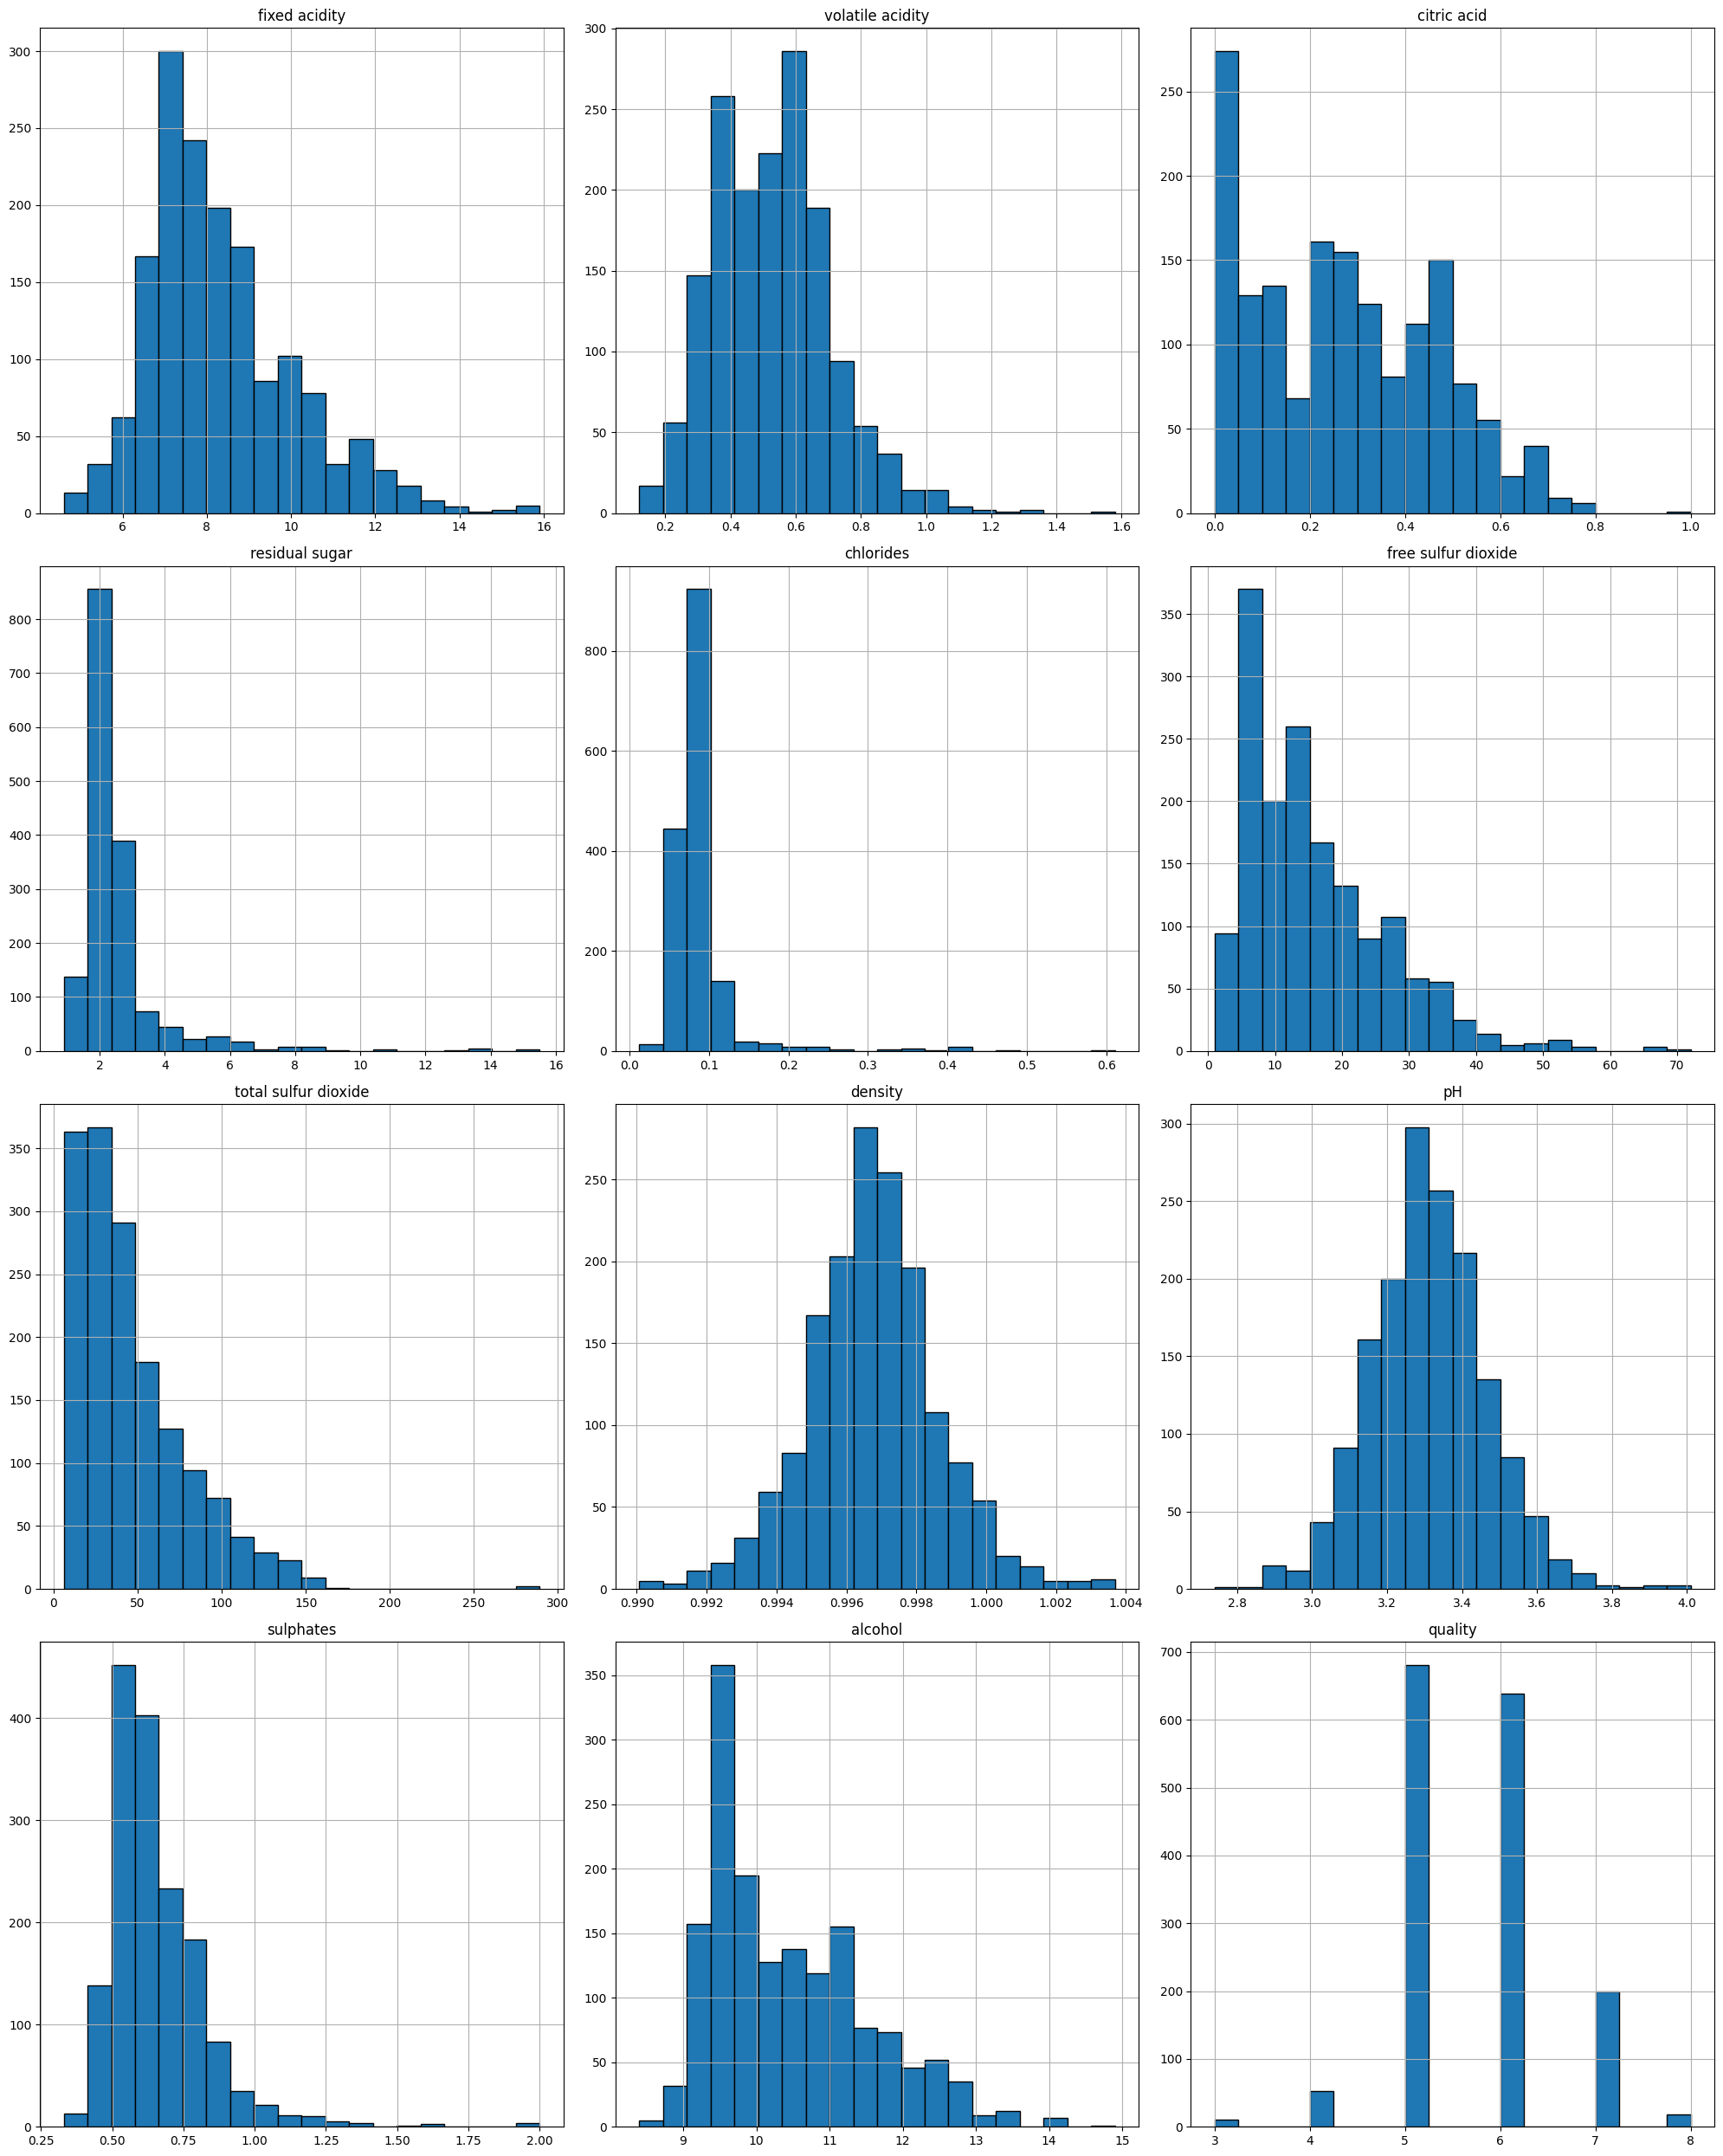

In [7]:
# 2.2 Vẽ histogram cho tất cả các biến và nhận xét
df.hist(bins=20, figsize=(20, 25), edgecolor='black')
plt.tight_layout()
plt.show()

<Axes: >

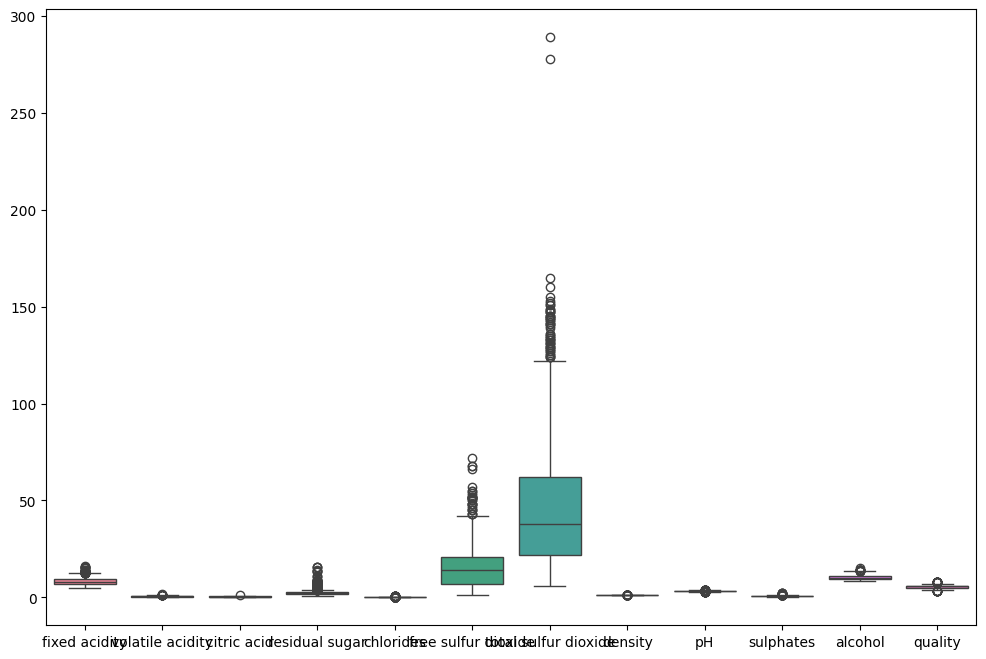

In [8]:
# 2.3 Vẽ boxplot cho tất cả các biến và nhận xét
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

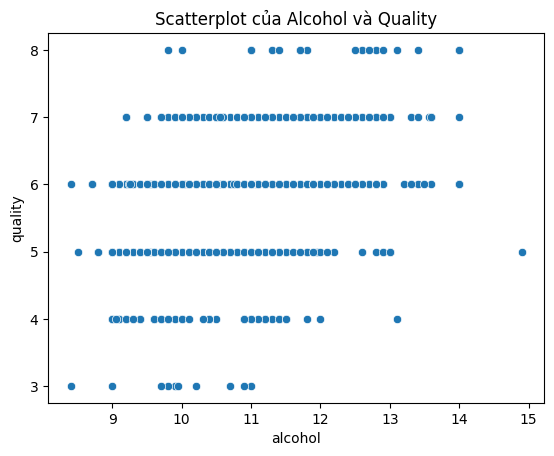

In [9]:
# 2.4 Vẽ Scatterplot cho "alcohol" và "quality"
sns.scatterplot(x='alcohol',y='quality',data=df)
plt.title('Scatterplot của Alcohol và Quality')
plt.show()

<Axes: >

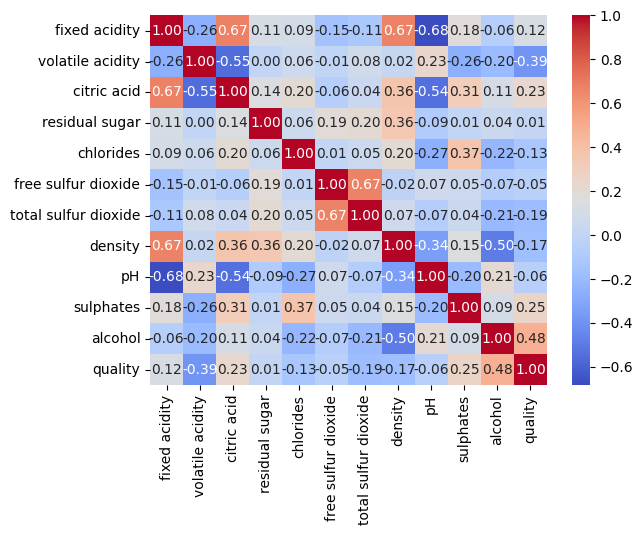

In [10]:
# 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt='.2f')

In [11]:
# 4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
# 4.1 Xáo trộn dữ liệu
np.random.seed(42)
shuffled_indices=np.random.permutation(len(df))
shuffled_data=df.iloc[shuffled_indices]

In [17]:
# 4.2 Chia dữ liệu với 80% huấn luyện
train_size = int(0.2 * len(df))


In [18]:
# 4.3 Tách dữ liệu
train_set = shuffled_data.iloc[:train_size]
test_set = shuffled_data.iloc[train_size:]

In [19]:
# 4.4 Tách đặc trưng và nhãn
X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1]
X_test, y_test = test_set.iloc[:, :-1], test_set.iloc[:, -1]


In [21]:
# 5. Chuẩn bị dữ liệu
# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
scaler=StandardScaler()

In [22]:
# 5.2 Chuẩn hóa huấn luyện
X_train_scaled=scaler.fit_transform(X_train)

In [23]:
# 5.3 Chuẩn hóa kiểm tra
X_test_scaled=scaler.fit_transform(X_test)

In [28]:
# 6. Ứng dụng mô hình hồi quy tuyến tính
# 6.1 Khởi tạo
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [29]:
# 6.2 Huấn luyện
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
# 6.3 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

In [33]:
#7. Đánh giá mô hình
# Tính MSE và R^2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.4404
R²: 0.3246


In [ ]:
#BTVH
# Bài 1: Hoàn thành bài tập trên sao cho đạt đoạn code có thể chạy mượt mà và chính xác

In [ ]:
# Bài 2: Cho bộ dữ liệu how long we live
# 2.1 Tôi muốn biết có bao nhiêu cột và hàng
# 2.2 Tôi muốn biết danh sách tên của các cột
# 2.3 Thử dùng df['status']
# 2.4 Tính số lượng các nước đang phát triển và các nước phát triển
# 2.5 Tính min, max, mean, median của alcohol
# 2.6 
# 2.6.1 Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
# 2.6.2 Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình

In [35]:
# Bài 2: Cho bộ dữ liệu how long we live
# 2.1 Tôi muốn biết có bao nhiêu cột và hàng
import pandas as pd
df = pd.read_csv("D:\MaiThienHuong-2274802010352\Số hóa và tt số\Lab 5/howlongwelive.csv") 
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")

Số hàng: 2938, Số cột: 22


In [36]:
# 2.2 Tôi muốn biết danh sách tên của các cột
column_names = df.columns.tolist()
print("Tên các cột:", column_names)

Tên các cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [40]:
# 2.3 Thử dùng df['status']
if 'Status' in df.columns:
    print("Cột 'Status' có tồn tại trong DataFrame.")
    print(df['Status'].head())  
else:
    print("Không tìm thấy cột 'Status'.")

Cột 'Status' có tồn tại trong DataFrame.
0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object


In [38]:
# 2.4 Tính số lượng các nước đang phát triển và các nước phát triển
if 'status' in df.columns:
    country_counts = df['status'].value_counts()
    print("Số lượng các nước phát triển và đang phát triển:")
    print(country_counts)

In [41]:
# 2.5 Tính min, max, mean, median của alcohol
if 'Alcohol' in df.columns:
    min_alcohol = df['Alcohol'].min()
    max_alcohol = df['Alcohol'].max()
    mean_alcohol = df['Alcohol'].mean()
    median_alcohol = df['Alcohol'].median()
    print(f"Alcohol - Min: {min_alcohol}, Max: {max_alcohol}, Mean: {mean_alcohol}, Median: {median_alcohol}")
else:
    print("Không tìm thấy cột 'Alcohol'.")

Alcohol - Min: 0.01, Max: 17.87, Mean: 4.602860787172012, Median: 3.755


In [44]:
# 2.6 
# 2.6.1 Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
if 'Alcohol' in df.columns and 'Country' in df.columns:
    high_alcohol_countries = df[df['Alcohol'] > mean_alcohol]['Country'].unique()
    print(f"Số quốc gia tiêu thụ rượu nhiều hơn mức trung bình: {len(high_alcohol_countries)}")
    print("Danh sách quốc gia:", high_alcohol_countries)

Số quốc gia tiêu thụ rượu nhiều hơn mức trung bình: 92
Danh sách quốc gia: ['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Equatorial Guinea' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Greece' 'Grenada' 'Guyana' 'Haiti' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Japan' 'Kazakhstan' "Lao People's Democratic Republic"
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Mongolia'
 'Montenegro' 'Namibia' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Republic of Korea' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'Rwanda' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Sao Tome and Principe' 'Serbi

In [47]:
# 2.6.2 Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
if 'Schooling' in df.columns and 'GDP' in df.columns and 'Country' in df.columns:
    mean_schooling = df['Schooling'].mean()
    mean_GDP = df['GDP'].mean()
    
    high_edu_gdp_countries = df[(df['Schooling'] > mean_schooling) & (df['GDP'] > mean_GDP)]['Country'].unique()
    print(f"Số quốc gia có trình độ học vấn và GDP cao hơn mức trung bình: {len(high_edu_gdp_countries)}")
    print("Danh sách quốc gia:", high_edu_gdp_countries)
else:
    print("Không tìm thấy cột 'Schooling' hoặc 'GDP'.")

Số quốc gia có trình độ học vấn và GDP cao hơn mức trung bình: 69
Danh sách quốc gia: ['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Barbados' 'Belarus' 'Belgium' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Canada' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Estonia' 'Finland' 'France'
 'Gabon' 'Germany' 'Greece' 'Grenada' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Mauritius'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Panama' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russian Federation' 'Saudi Arabia'
 'Seychelles' 'Singapore' 'Slovenia' 'South Africa' 'Spain' 'Suriname'
 'Sweden' 'Switzerland' 'Trinidad and Tobago' 'Turkey'
 'United Arab Emirates' 'Uruguay']
